# 08_01 THE BEST ESTIMATOR_V6

## MODELAR ALGORITMO DE CLASIFICACIÓN 

Vamos a parametrizar el algoritmo con mejor roc_auc del entrenamiento y evaluación con XGBClassifier sin preselección de variables y con balanceo de datos.

XGBClassifier()

## IMPORTACIÓN DE PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Crear datasets de entrenamiento y validación
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


#Optimizar modelo
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from yellowbrick.classifier import discrimination_threshold, DiscriminationThreshold
import scikitplot as skplt



#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle

## IMPORTACIÓN DE DATOS

## CARGAR LOS DATOS

In [2]:
x = pd.read_pickle('../../02_Datos/03_Trabajo/x_balanceo.pickle')
y = pd.read_pickle('../../02_Datos/03_Trabajo/y_balanceo.pickle')

## MODELIZAR

### RESERVAR LOS DATASET DE ENTRENAMIENTO Y VALIDACIÓN

In [3]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state = 42)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES 

In [4]:
pipe = Pipeline([('algoritmo', XGBClassifier())])

grid = [
        {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]
         }
       ]

### OPTIMIZAR LOS HIPERPARÁMETROS

In [5]:
grid_search = GridSearchCV( estimator= pipe,
                           param_grid= grid,
                           cv = 5,
                           scoring= 'roc_auc',
                           verbose=0,
                           n_jobs= -1
                        )

modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__n_estimators,param_algoritmo__n_jobs,param_algoritmo__reg_alpha,...,param_algoritmo__verbosity,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
413,0.262402,0.015423,0.013541,0.005506,"XGBClassifier(base_score=None, booster=None, c...",0.1,20,500,-1,0.1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.986111,0.972222,0.965278,1.0,1.0,0.984722,0.014164,1
389,0.505076,0.057981,0.008377,0.001492,"XGBClassifier(base_score=None, booster=None, c...",0.1,10,1000,-1,0.1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.986111,0.972222,0.965278,1.0,1.0,0.984722,0.014164,1
341,0.240600,0.021598,0.008379,0.001198,"XGBClassifier(base_score=None, booster=None, c...",0.1,5,500,-1,0.1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.986111,0.972222,0.965278,1.0,1.0,0.984722,0.014164,1
374,0.247004,0.034991,0.008269,0.001448,"XGBClassifier(base_score=None, booster=None, c...",0.1,10,500,-1,0,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.986111,0.972222,0.965278,1.0,1.0,0.984722,0.014164,1
386,0.408500,0.024842,0.007581,0.000490,"XGBClassifier(base_score=None, booster=None, c...",0.1,10,1000,-1,0,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.986111,0.972222,0.965278,1.0,1.0,0.984722,0.014164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.032965,0.002403,0.004890,0.000659,"XGBClassifier(base_score=None, booster=None, c...",0.01,5,100,-1,0.1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.916667,0.902778,0.868056,1.0,1.0,0.937500,0.053432,424
3,0.037539,0.009166,0.005784,0.000976,"XGBClassifier(base_score=None, booster=None, c...",0.01,5,100,-1,0.1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.916667,0.902778,0.868056,1.0,1.0,0.937500,0.053432,424
1,0.036348,0.003689,0.006986,0.003524,"XGBClassifier(base_score=None, booster=None, c...",0.01,5,100,-1,0,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.916667,0.902778,0.868056,1.0,1.0,0.937500,0.053432,424
40,0.072529,0.010924,0.009104,0.001779,"XGBClassifier(base_score=None, booster=None, c...",0.01,10,100,-1,0.1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.916667,0.902778,0.868056,1.0,1.0,0.937500,0.053432,424


In [6]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
                               n_jobs=-1, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [7]:
modelo.best_params_

{'algoritmo': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=-1, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'algoritmo__learning_rate': 0.05,
 'algoritmo__max_depth': 5,
 'algoritmo__n_estimators': 500,
 'algoritmo__n_jobs': -1,
 'algoritmo__reg_alpha': 0.1,
 'algoritmo__reg_lambda': 0.1,
 'algoritmo__verbosity': 0}

In [8]:
modelo.best_score_

0.9847222222222222

### GUARDAR MODELO.BEST_ESTIMATOR Y PARÁMETROS

In [9]:
modelo_best_estimator = modelo

#### Guardar modelo, parámetros y score

In [10]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### PREDECIR Y EVALUAR SOBRE EL TRAIN

### Predecir sobre el Train

In [11]:
pred = modelo.best_estimator_.predict(train_x)

### Evaluar sobre el Train

In [12]:
t_roc_auc = roc_auc_score(train_y, pred)
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Roc AUC: {t_roc_auc}")
print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Roc AUC: 0.9883720930232558
Accuracy: 0.9882352941176471
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.98      1.00      0.99        42

    accuracy                           0.99        85
   macro avg       0.99      0.99      0.99        85
weighted avg       0.99      0.99      0.99        85



### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

### Predecir sobre la validación

In [13]:
pred = modelo.best_estimator_.predict(val_x)
pred_proba = modelo.best_estimator_.predict_proba(val_x)[:,1]

### Evaluar sobre la validación

In [14]:
v_roc_auc_proba = roc_auc_score(val_y, pred_proba)
v_roc_auc = roc_auc_score(val_y, pred)
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:{v_report}")

Roc AUC_proba: 0.9181286549707602
Roc AUC: 0.8625730994152047
Accuracy: 0.8648648648648649
Classification Report:              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.82      0.95      0.88        19

    accuracy                           0.86        37
   macro avg       0.88      0.86      0.86        37
weighted avg       0.87      0.86      0.86        37



## REPORTING DEL MODELO

Matrix de Confusión MultiClass

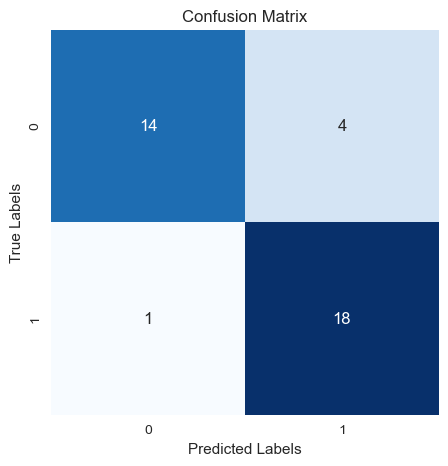

In [15]:
# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Precision-Recall

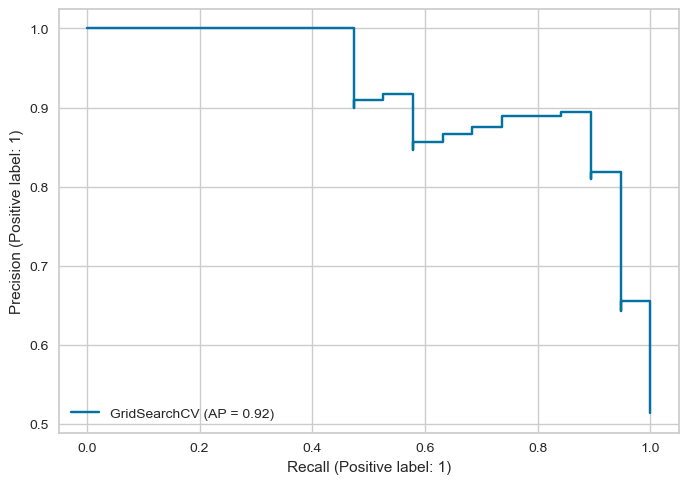

In [16]:
PrecisionRecallDisplay.from_estimator(modelo_best_estimator, val_x, val_y)

El mejor best_threshold: 0.64831114


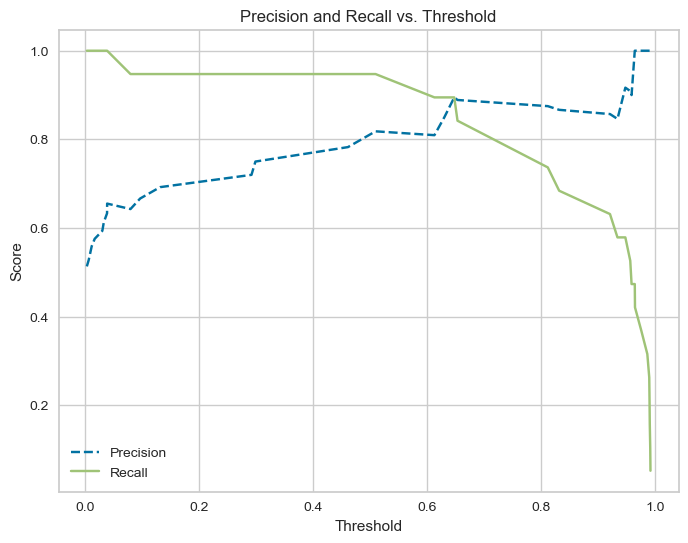

In [17]:
# Calcula la curva de precisión y recall para diferentes umbrales de corte
precision, recall, thresholds = precision_recall_curve(val_y, pred_proba)

# Grafica la relación entre la precisión y el recall en función del umbral de corte
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision and Recall vs. Threshold')

# Encuentra el umbral que maximiza F1-score (o ajusta según tus necesidades)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("El mejor best_threshold:", best_threshold)

### ROC Chart

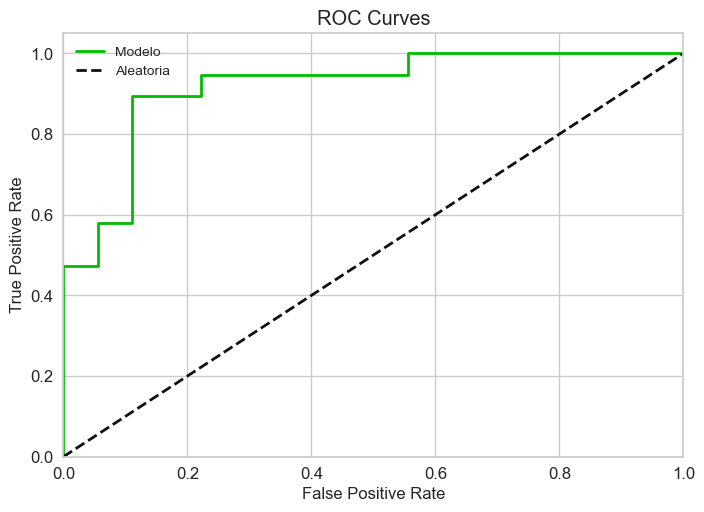

In [30]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()            
ax.lines[1].remove()
ax.lines[1].remove()
plt.legend(labels = ['Modelo','Aleatoria']);

## ESTABLECER UMBRAL DE CORTE

En este caso, al laboratorio o especialista le interesa tener una alta precisión en los casos y tener menos casos de falsos positivos. Por ese motivo vamos a aplicar un umbral de corte equilibrado entre precision y recall para tener el mayor caso de positivos reales y evitar falsos positivos.

In [26]:

def calcular_metricas(real, scoring, umbral):
    
    #CALCULAR LA DECISION SEGUN EL UMBRAL
    predicho = np.where(scoring > umbral,1,0) 
    
    #CALCULAR TODAS LAS MÉTRICAS
    conf = confusion_matrix(real,predicho)

    tn, fp, fn, tp = conf.ravel()

    total_casos = y.shape[0]
    
    accuracy = (tn + tp) / total_casos
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)

    #IMPRIMIR RESULTADOS
    # Crear un mapa de calor de la matriz de confusión
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf, annot=True, cmap="Blues", fmt="d", cbar=False)
    # Configurar etiquetas y título del gráfico
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix");
    print('\nUmbral de corte:', umbral)
    print('accuracy:',round(accuracy,3))
    print('precision:',round(precision,3))
    print('recall:',round(recall,3))
    print('F1:',round(F1,3))


Umbral de corte: 0.64831114
accuracy: 0.262
precision: 0.889
recall: 0.842
F1: 0.865


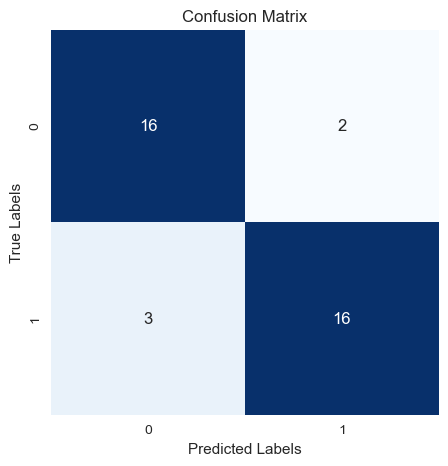

In [29]:
calcular_metricas(val_y, pred_proba, best_threshold)

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [39]:
version_estimator = '_v06'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'XGBClassifier_v06.pickle'

In [40]:
m_best_estimator

'XGBClassifier'

In [41]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [42]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Modelo XGBClassifier con parámetros para evitar el sobreajuste sin preselección de variables y con balanceo de datos (Smote-Tomek)"
x_columns = list(x.columns)
y_target = y.name


In [43]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_roc_auc_proba': v_roc_auc_proba,
               'v_roc_auc': v_roc_auc,
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                        XGBClassifier
m_Best_paramans     {'algoritmo': XGBClassifier(base_score=None, b...
m_Best_Score                                       0.9847222222222222
t_accuracy                                                   0.988235
t_report                          precision    recall  f1-score   ...
v_roc_auc_proba                                              0.918129
v_roc_auc                                                    0.862573
v_accuracy                                                   0.864865
v_report                          precision    recall  f1-score   ...
comentarios         Modelo XGBClassifier con parámetros para evita...
predictoras_X       [estacion, edad, e_infantil, acc_grave, int_qu...
target_y                                                   produccion
Name: XGBClassifier_v06.pickle, dtype: object

In [44]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [45]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')

**CONCLUSIÓN**: Vemos que el modelo con los datos de valuación tiene un AUC [1] del 91% debido al Smote-Tomek. Hemos obtenido tanto un precisión como un recall muy buenos con los datos de validación y hemos aplicado el umbral de corte para ajustar entre estas dos variables. 

**PRÓXIMOS PASOS:**

Realizaremos el modelo definitivo con este modelo. Pero antes veremos si podemos ajustar el precisión y recall para ajustar los falsos positivos. 